# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [59]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [5]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [6]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [ ]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [ ]:
df

## Analyzing Data in Files

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.

If you do not have it, then uncomment below the lines that start with ! and execute the following:

In [ ]:
# Creates a folder "data" under the current folder
!mkdir -p data
# Removes any prior file if it exists
!rm -f data/restaurant.csv*
# Fetches the most recent dataset and stores it under the folder data
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
# Compresses the text file, both for saving space and for loading faster
!gzip data/restaurant.csv
# Take a look at the first 3 lines of the file, to ensure that everything worked fine
# !gzip -cd data/restaurant.csv.gz | head -3

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [ ]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [ ]:
restaurants.head(5)

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [ ]:
restaurants.describe()

We can also check the data types for each column

In [ ]:
restaurants.dtypes

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [ ]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [ ]:
restaurants.SCORE.describe()

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

In [ ]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

In [ ]:
restaurants["SCORE"].hist(bins=50)

In [ ]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

In [ ]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

In [ ]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [ ]:
restaurants["GRADE DATE"].head(10)

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [ ]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [ ]:
restaurants.dtypes

In [ ]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

In [ ]:
# your code here

#### Solution

In [ ]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

In [ ]:
restaurants['GRADE DATE'].hist()

In [ ]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

In [ ]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [ ]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [ ]:
restaurants["DBA"].value_counts()[:10] 

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [ ]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [ ]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [ ]:
restaurants["VIOLATION CODE"].head(5)

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

In [ ]:
violation_counts[0:20].plot(kind='bar')

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [ ]:
# your code here

#### Solution 

In [ ]:
restaurants['BORO'].value_counts()

In [ ]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

In [ ]:
restaurants['BORO'].value_counts().plot(kind='bar')

In [ ]:
restaurants['BORO'].value_counts().plot(kind='barh')

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [ ]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ]

In [ ]:
columns = ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head(10)

In [ ]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"] ].head(10)

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

In [ ]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

In [ ]:
restaurants["DBA"].value_counts()[:10]

In [ ]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

In [ ]:
has_mice["CAMIS"].value_counts()[:5]

In [ ]:
condition = (has_mice["CAMIS"] == '41259444')
has_mice[condition]

And we can use more complex conditions. 

In [ ]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == "10012") )

In [ ]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

In [ ]:
bhas_mice_10012["DBA"].value_counts()[:20]

In [ ]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='barh')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.plot()

In [ ]:
pivot.head(5)

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [ ]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

In [ ]:
pivot.head(5)

And let's plot again.

In [ ]:
pivot.plot(figsize=(10,5))

In [ ]:
pivot.tail(50).plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample('1W').mean().tail(10)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

In [ ]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

In [ ]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.tail(10)

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis='columns')

In [ ]:
pivot2.tail(5)

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

In [ ]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot(figsize=(10,5))

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

### (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants, #
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # compute the average SCORE
)

In [ ]:
pivot.plot(figsize=(10,4))

In [ ]:
pivot.resample('1M').mean().tail(10)



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # dates are the rows
    columns = 'CUISINE DESCRIPTION', # cuisines are the columns
    values = 'SCORE',  # we analyze the SCORE
    aggfunc = 'mean' # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[ ["American", "French", "Chinese"] ].resample('1M').mean().plot(figsize=(10,4))

## Exercise: NYPD Vehicle Collisions

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### Task 1: 

Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 


In [1]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  288M    0  288M    0     0  2261k      0 --:--:--  0:02:10 --:--:-- 2434k2124k      0 --:--:--  0:00:11 --:--:-- 2161k:--  0:01:47 --:--:-- 2233k


In [7]:
df = pd.read_csv("accidents.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
len(df)

1360949

#### Solution

In [ ]:
# It is a big file, ~270Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

In [ ]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [ ]:
df.dtypes


### Task 2: 

Find out the most common contributing factors to the collisions. 
 

In [9]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

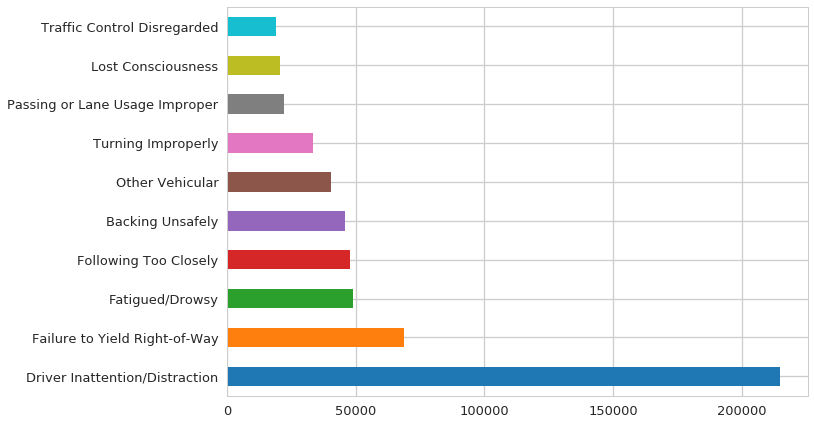

In [14]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:11].plot(kind='barh')

In [13]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(11).tail(10)

Driver Inattention/Distraction    215006
Failure to Yield Right-of-Way      68559
Fatigued/Drowsy                    48671
Following Too Closely              47863
Backing Unsafely                   45757
Other Vehicular                    40413
Turning Improperly                 33389
Passing or Lane Usage Improper     22203
Lost Consciousness                 20389
Traffic Control Disregarded        18993
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

#### Solution

In [ ]:
# Task 2: Find out the most common contributing factors to the collisions.
# Notice that we skip the first element (0) of the list, and we get the elements 1:10
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

### Task 3: 

Break down the number of collisions by borough.





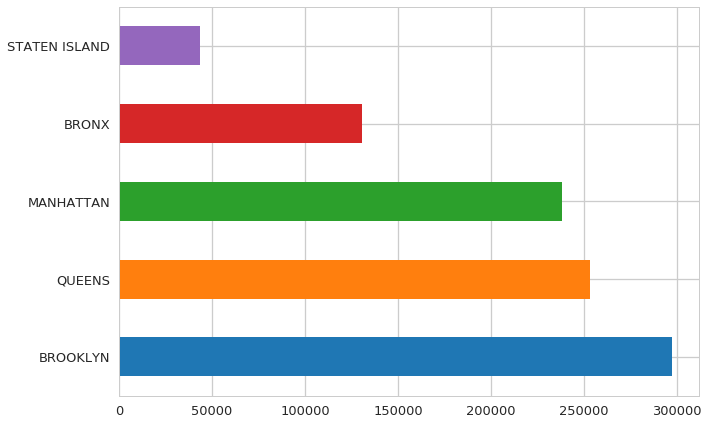

In [17]:
df.BOROUGH.value_counts().plot(kind='barh')

#### Solution

In [ ]:
# Task 3: Break down the number of collisions by borough.
df['BOROUGH'].value_counts().plot(kind='barh')

### Task 4

Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

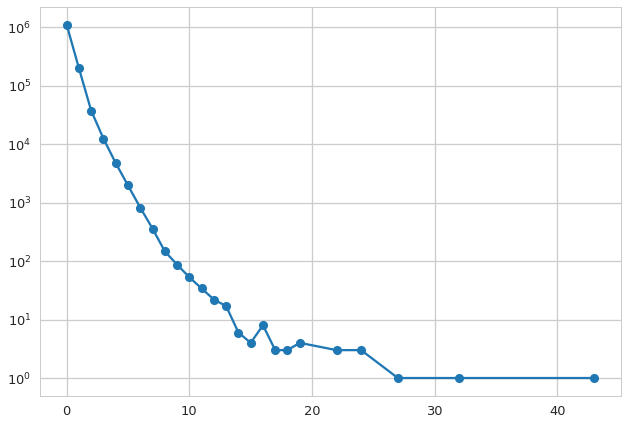

In [29]:
(
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)

#### Solution

In [ ]:
# "Chain" style of writing data maniputation operations
plot = (
    df['NUMBER OF PERSONS INJURED'] # We analyze people injured
    .value_counts() # Count how many accidents had this number of injuries
    .sort_index() # Sort the x-axis
    .plot( 
        # kind='bar', # Create a bar plot
        logy=True # Make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

### Task 5

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

In [30]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [34]:
pd.pivot_table(
    data = df,
    index = 'CONTRIBUTING FACTOR VEHICLE 1',
    columns = 'BOROUGH',
    aggfunc = 'count',
    values = 'UNIQUE KEY'
)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
CONTRIBUTING FACTOR VEHICLE 1,,,,,
Accelerator Defective,76.0,138.0,83.0,119.0,32.0
Aggressive Driving/Road Rage,593.0,942.0,831.0,673.0,120.0
Alcohol Involvement,1290.0,2521.0,1405.0,2599.0,453.0
Animals Action,65.0,122.0,52.0,142.0,128.0
Backing Unsafely,5058.0,10564.0,7751.0,11000.0,1648.0
Brakes Defective,452.0,819.0,470.0,608.0,182.0
Cell Phone (hand-Held),7.0,6.0,3.0,4.0,1.0
Cell Phone (hand-held),26.0,47.0,36.0,31.0,5.0
Cell Phone (hands-free),15.0,56.0,58.0,33.0,6.0


#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

### Task 6

Find the dates with the most accidents. Can you figure out what happened on these days? 


In [44]:
df.DATE.value_counts()

01/21/2014    1161
12/15/2017     994
05/19/2017     964
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     905
01/07/2017     895
12/14/2017     880
03/02/2018     874
09/30/2016     872
11/26/2013     867
04/28/2017     854
03/08/2013     851
10/21/2016     851
06/29/2018     843
06/22/2017     840
03/16/2017     834
10/27/2016     831
03/05/2015     830
06/13/2017     822
06/14/2018     821
10/30/2017     820
11/20/2015     819
09/15/2017     818
09/06/2018     818
10/20/2017     816
05/12/2017     814
05/29/2015     813
09/23/2016     812
              ... 
07/29/2012     376
03/14/2017     374
01/13/2013     373
09/03/2012     373
10/30/2012     372
05/29/2017     370
12/25/2016     365
02/01/2015     361
01/20/2014     360
07/04/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
11/04/2012     344
06/14/2016     344
03/02/2014     344
01/11/2015     341
12/25/2017     329
12/25/2015     321
01/05/2014  

#### Solution

In [45]:
df.DATE.value_counts()

01/21/2014    1161
12/15/2017     994
05/19/2017     964
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     905
01/07/2017     895
12/14/2017     880
03/02/2018     874
09/30/2016     872
11/26/2013     867
04/28/2017     854
03/08/2013     851
10/21/2016     851
06/29/2018     843
06/22/2017     840
03/16/2017     834
10/27/2016     831
03/05/2015     830
06/13/2017     822
06/14/2018     821
10/30/2017     820
11/20/2015     819
09/15/2017     818
09/06/2018     818
10/20/2017     816
05/12/2017     814
05/29/2015     813
09/23/2016     812
              ... 
07/29/2012     376
03/14/2017     374
01/13/2013     373
09/03/2012     373
10/30/2012     372
05/29/2017     370
12/25/2016     365
02/01/2015     361
01/20/2014     360
07/04/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
11/04/2012     344
06/14/2016     344
03/02/2014     344
01/11/2015     341
12/25/2017     329
12/25/2015     321
01/05/2014  

### Task 7

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


In [47]:
df.DATE = pd.to_datetime(df.DATE, format="%m/%d/%Y")

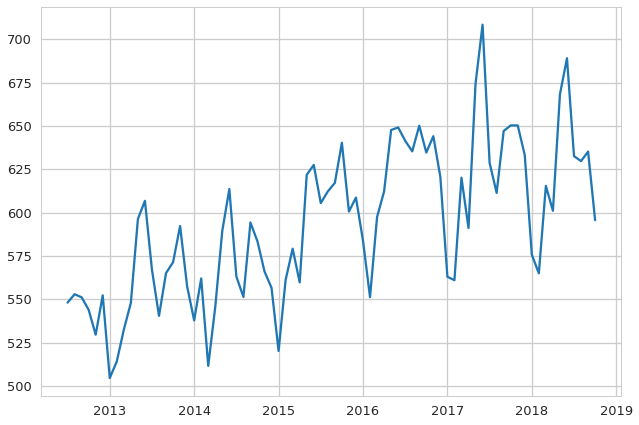

In [57]:
(
    df.DATE
    .value_counts() # compute number of accidents per day
    .sort_index() # sort the results chronologically
    .resample('1M') # compute the mean number of accidents/day over a period of a year
    .mean() 
    .plot() # plot the results
)

#### Solution 

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")

In [ ]:
(
    df.DATE.value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2018-05-31'), axis='index') # drop the current month
    .plot() # plot the result
)

### Task 8

Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

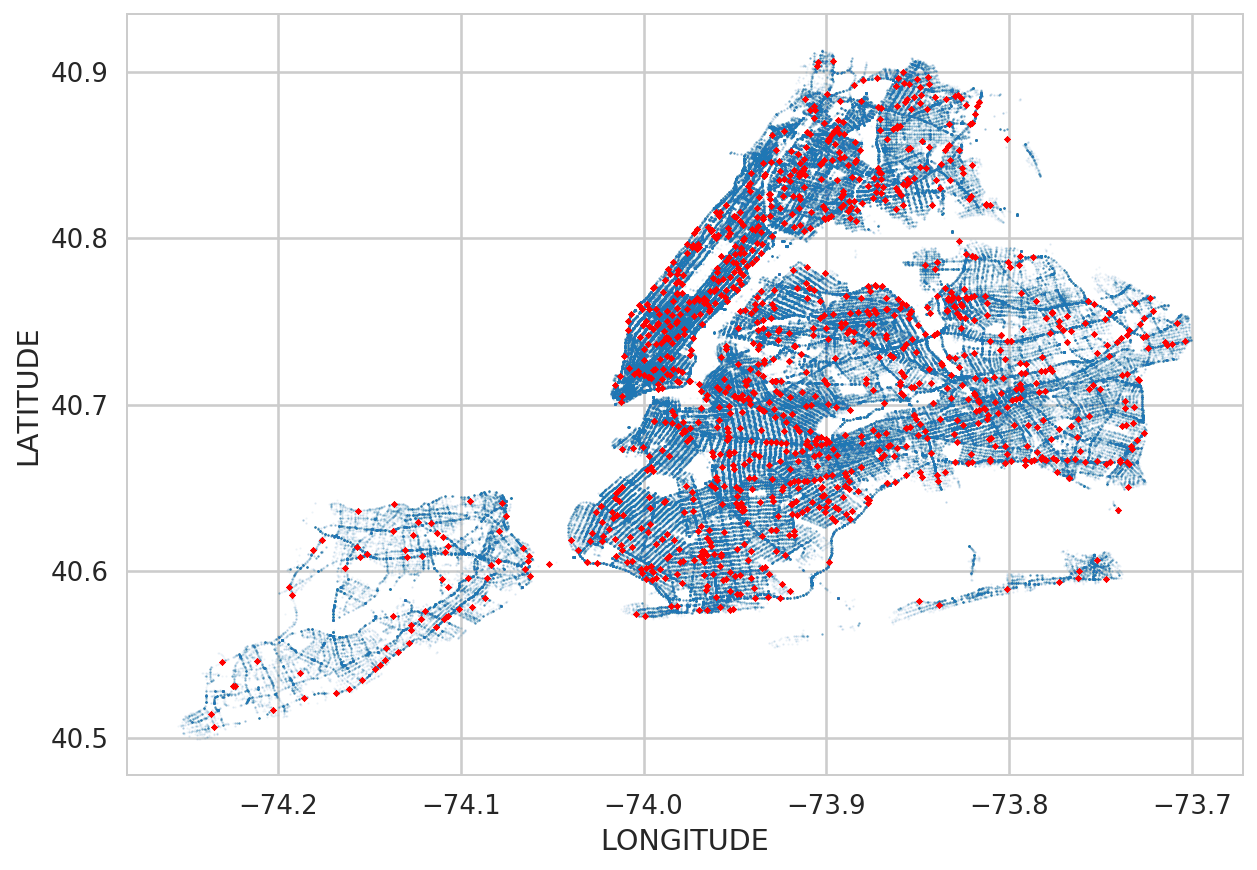

In [74]:
base = df[ (df.LATITUDE>40) & (df.LATITUDE<41) & (df.LONGITUDE> -74.6) & (df.LONGITUDE<-50) ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7),
    s = 0.5, # make each dot to be very small 
    alpha = 0.05 # makes each point 95% transparent
)

df[ (df.LATITUDE>40) & (df.LATITUDE<41) & (df.LONGITUDE> -74.6) & (df.LONGITUDE<-50)
    & (df["NUMBER OF PERSONS KILLED"]>0)
  ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7), color = 'red', marker = 'x', s=3,
    ax = base
    #s = 0.5, # make each dot to be very small 
    #alpha = 0.05 # makes each point 95% transparent
)

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Task 9

Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Bonus plots

In [ ]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

In [ ]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)
